In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load Data

In [2]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


## Data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
holiday                48204 non-null object
temp                   48204 non-null float64
rain_1h                48204 non-null float64
snow_1h                48204 non-null float64
clouds_all             48204 non-null int64
weather_main           48204 non-null object
weather_description    48204 non-null object
date_time              48204 non-null object
traffic_volume         48204 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [4]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


#### Visualize numerical attributes

Text(0.5, 1.0, 'clouds_all')

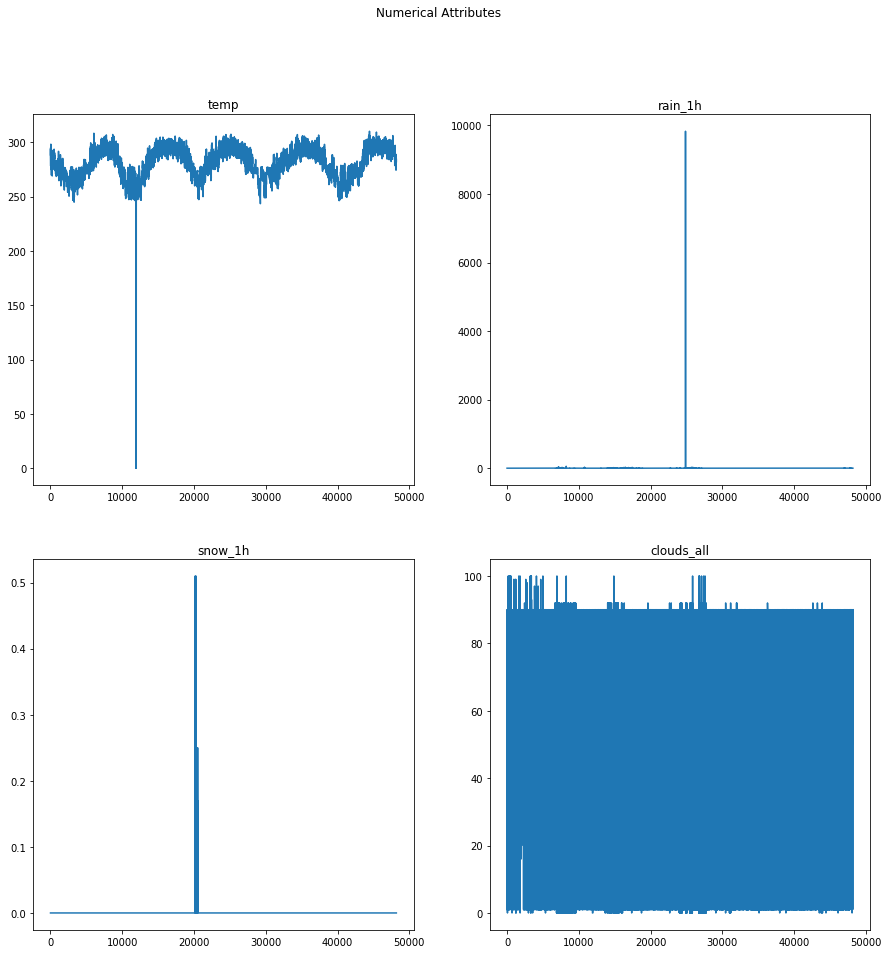

In [5]:
fig, ax = plt.subplots(2, 2,figsize=(15,15))
fig.suptitle('Numerical Attributes')
ax[0, 0].plot(df.temp)
ax[0, 0].set_title('temp')
ax[0, 1].plot(df.rain_1h)
ax[0, 1].set_title('rain_1h')
ax[1, 0].plot(df.snow_1h)
ax[1, 0].set_title('snow_1h')
ax[1, 1].plot(df.clouds_all)
ax[1, 1].set_title('clouds_all')

Text(0.5, 1.0, 'traffic volume')

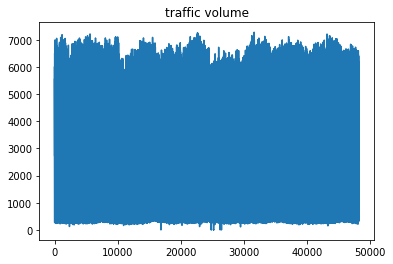

In [6]:
plt.plot(df.traffic_volume)
plt.title("traffic volume")

#### Explore categorical attributes

In [7]:
# categorical attributes unique values
print("holiday categories:", df.holiday.unique())
print("\nweather categories:", df.weather_main.unique())
print("\nweather description categories:", df.weather_description.unique())

holiday categories: ['None' 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']

weather categories: ['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']

weather description categories: ['scattered clouds' 'broken clouds' 'overcast clouds' 'sky is clear'
 'few clouds' 'light rain' 'light intensity drizzle' 'mist' 'haze' 'fog'
 'proximity shower rain' 'drizzle' 'moderate rain' 'heavy intensity rain'
 'proximity thunderstorm' 'thunderstorm with light rain'
 'proximity thunderstorm with rain' 'heavy snow' 'heavy intensity drizzle'
 'snow' 'thunderstorm with heavy rain' 'freezing rain' 'shower snow'
 'light rain and snow' 'light intensity shower rain' 'SQUALLS'
 'thunderstorm with rain' 'proximity thunderstorm with drizzle'
 'thunderstorm' 'Sky is Clear' 'very heavy rain'
 'thunderstorm with light drizzle' 

In [8]:
df["holiday"].value_counts()

None                         48143
Labor Day                        7
New Years Day                    6
Martin Luther King Jr Day        6
Thanksgiving Day                 6
Christmas Day                    6
Veterans Day                     5
Washingtons Birthday             5
Memorial Day                     5
State Fair                       5
Independence Day                 5
Columbus Day                     5
Name: holiday, dtype: int64

Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64

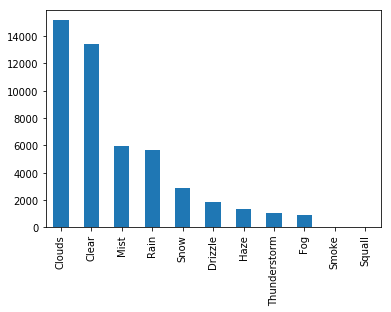

In [9]:
df["weather_main"].value_counts().plot(kind='bar')
df["weather_main"].value_counts()

In [10]:
df["weather_description"].value_counts()

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

In [11]:
rain = df.rain_1h[df.rain_1h<100]

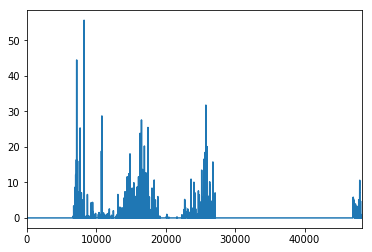

In [12]:
rain.plot()

## Data processing

In [13]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [14]:
# Change holiday column to be a boolean: True if holiday else False
df["holiday_bool"] = np.where(df.holiday=="None", 0, 1)
df["holiday_bool"] = df["holiday_bool"].astype('int8')

In [15]:
# change temp from kelvin to celsius (for better readability)
df['temp_c'] = df['temp'] - 273.15

In [16]:
# drop outliers
df.drop(df[df.temp_c < -50].index, inplace=True)
df.drop(df[df.rain_1h > 9000].index, inplace=True)

Text(0.5, 1.0, 'clouds_all')

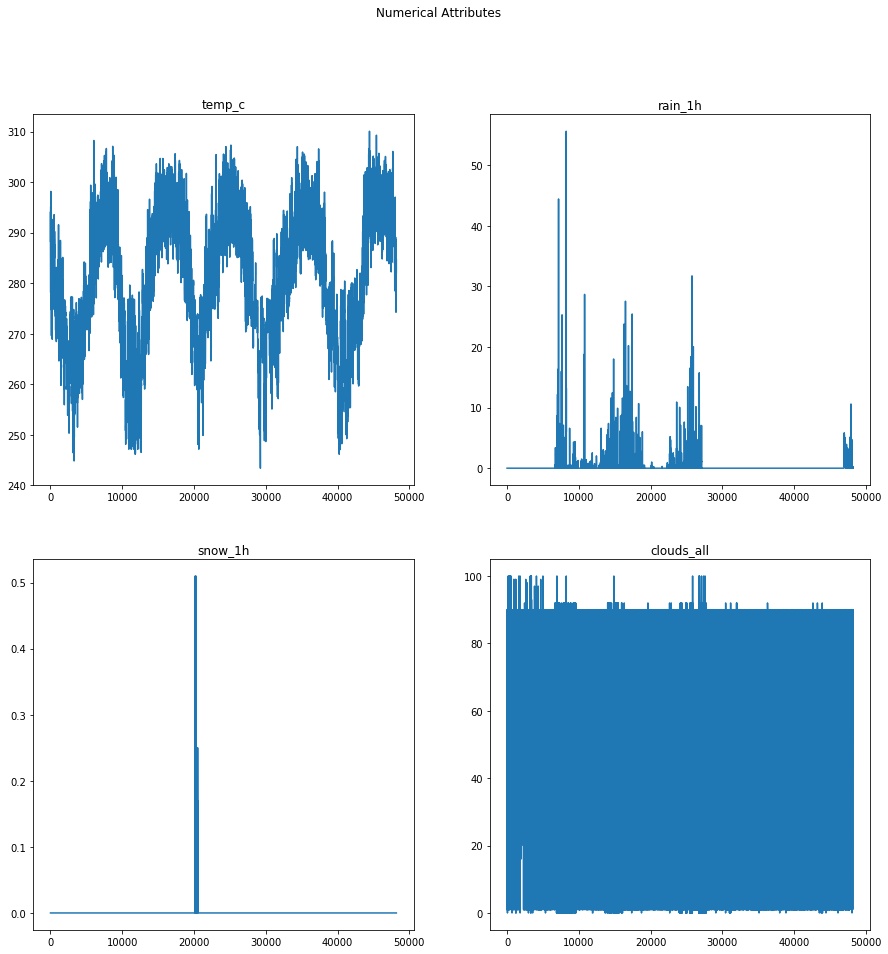

In [17]:
fig, ax = plt.subplots(2, 2,figsize=(15,15))
fig.suptitle('Numerical Attributes')
ax[0, 0].plot(df.temp)
ax[0, 0].set_title('temp_c')
ax[0, 1].plot(df.rain_1h)
ax[0, 1].set_title('rain_1h')
ax[1, 0].plot(df.snow_1h)
ax[1, 0].set_title('snow_1h')
ax[1, 1].plot(df.clouds_all)
ax[1, 1].set_title('clouds_all')

In [18]:
# one hot encode weather description column
df["weather_main_cat"] = df["weather_main"].astype("category", categories=df.weather_main.unique())
dummy_weather = pd.get_dummies(df["weather_main_cat"])
df = pd.concat([df, dummy_weather], axis=1)
df.head()

C:\anaconda37\lib\site-packages\IPython\core\interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,holiday_bool,...,Clear,Rain,Drizzle,Mist,Haze,Fog,Thunderstorm,Snow,Squall,Smoke
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,0,...,0,0,0,0,0,0,0,0,0,0
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,0,...,0,0,0,0,0,0,0,0,0,0
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,0,...,0,0,0,0,0,0,0,0,0,0
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,0,...,0,0,0,0,0,0,0,0,0,0
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# aggregate rows with same date-time
df_agg = df.groupby('date_time',as_index=False).agg('max')

In [20]:
# convert date_time column to datetime format
df_agg['date_time'] = pd.to_datetime(df_agg['date_time'])

In [21]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40564 entries, 0 to 40563
Data columns (total 22 columns):
date_time              40564 non-null datetime64[ns]
holiday                40564 non-null object
temp                   40564 non-null float64
rain_1h                40564 non-null float64
snow_1h                40564 non-null float64
clouds_all             40564 non-null int64
weather_main           40564 non-null object
weather_description    40564 non-null object
traffic_volume         40564 non-null int64
holiday_bool           40564 non-null int8
temp_c                 40564 non-null float64
Clouds                 40564 non-null uint8
Clear                  40564 non-null uint8
Rain                   40564 non-null uint8
Drizzle                40564 non-null uint8
Mist                   40564 non-null uint8
Haze                   40564 non-null uint8
Fog                    40564 non-null uint8
Thunderstorm           40564 non-null uint8
Snow                   40564 non-nul

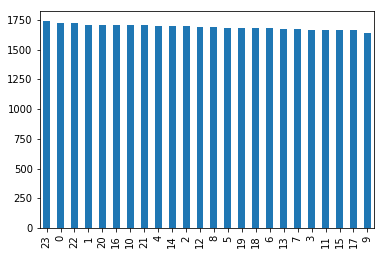

In [22]:
# create column with hours from date_time
df_agg['hour'] = df_agg['date_time'].dt.hour
df_agg['hour'].value_counts().plot(kind='bar')

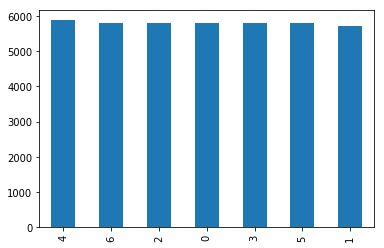

In [23]:
# create column with day of the week from date_time
df_agg['day_of_week'] = df_agg['date_time'].dt.dayofweek
df_agg['day_of_week'].value_counts().plot(kind='bar')

Text(0, 0.5, 'traffic volume')

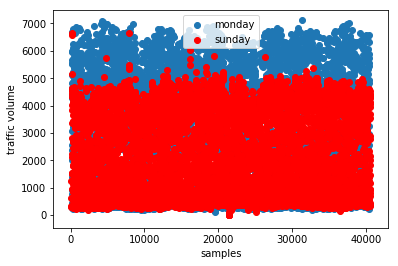

In [24]:
# scatter plot for different days of week 
plt.scatter(df_agg[df_agg.day_of_week==0].index, df_agg[df_agg.day_of_week==0].traffic_volume, label='monday')
plt.scatter(df_agg[df_agg.day_of_week==6].index, df_agg[df_agg.day_of_week==6].traffic_volume, color='r', label='sunday')
plt.legend()
plt.xlabel('samples')
plt.ylabel('traffic volume')

Text(0, 0.5, 'traffic volume')

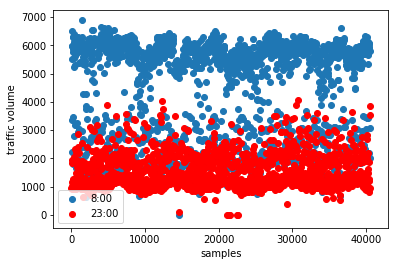

In [25]:
# scatter plot for different hours 
plt.scatter(df_agg[df_agg.hour==8].index, df_agg[df_agg.hour==8].traffic_volume, label='8:00')
plt.scatter(df_agg[df_agg.hour==23].index, df_agg[df_agg.hour==23].traffic_volume, color='r', label='23:00')
plt.legend(loc='best')
plt.xlabel('samples')
plt.ylabel('traffic volume')

In [26]:
# is_day_off column creation
df_agg['is_day_off'] = np.where(np.logical_or(df_agg.day_of_week==5, df_agg.day_of_week==6), 1, 0)
df_agg['is_day_off'] = np.where(df_agg.holiday_bool==1, 1, df_agg['is_day_off'])

Text(0, 0.5, 'traffic volume')

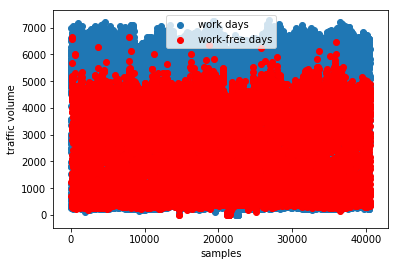

In [27]:
# scatter plot of is_day_off 
plt.scatter(df_agg[df_agg.is_day_off==0].index, df_agg[df_agg.is_day_off==0].traffic_volume, label='work days')
plt.scatter(df_agg[df_agg.is_day_off==1].index, df_agg[df_agg.is_day_off==1].traffic_volume, color='r', label='work-free days')
plt.legend(loc='best')
plt.xlabel('samples')
plt.ylabel('traffic volume')

In [28]:
df_agg.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,holiday_bool,...,Mist,Haze,Fog,Thunderstorm,Snow,Squall,Smoke,hour,day_of_week,is_day_off
0,2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,0,...,0,0,0,0,0,0,0,9,1,0
1,2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,0,...,0,0,0,0,0,0,0,10,1,0
2,2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,0,...,0,0,0,0,0,0,0,11,1,0
3,2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,0,...,0,0,0,0,0,0,0,12,1,0
4,2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,0,...,0,0,0,0,0,0,0,13,1,0


In [31]:
# save preprocessed data to csv
preprocessed_data = df_agg[['rain_1h', 'snow_1h', 'clouds_all',
       'temp_c', 'Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke', 'hour', 'is_day_off', 'day_of_week', 'holiday_bool', 'traffic_volume']]
preprocessed_data.to_csv("preprocessed_data.csv")